In [252]:
from pathlib import Path
from data_processing import read_data, with_big_monthly_sessions, collect_sessions_data
from graphics import plot_session_graphic, draw, calculate_clusters

DATA_FILE = Path.cwd() / 'data' / 'trade_info.sqlite3'

Данные считываются, времена и даты приводятся в удобный формат и выфильтровываются только ежемесячные торги с минимум 20 событиями

In [253]:
df = read_data(DATA_FILE)
df_filtered = with_big_monthly_sessions(df)

Для каждой сессии час, в который она прошла, нарезается на интервалы по 5 минут, внутри каждого интервала берётся средневзвешенное значение цены, таким образом для каждой сессии получается вектор одинаковой цены:

In [254]:
DELTA = 5
data = collect_sessions_data(df_filtered, minutes_delta=DELTA)

Пример для 2 сессий:

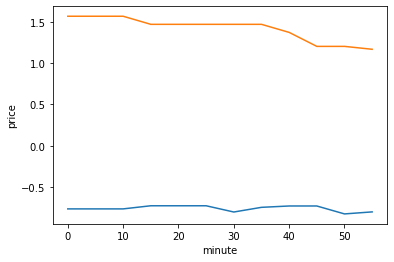

In [255]:
plot_session_graphic(data, 39, minutes_delta=DELTA)
plot_session_graphic(data, 210, minutes_delta=DELTA)

Если отнормировать, станет получше:

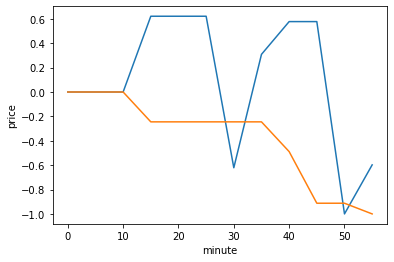

In [256]:
plot_session_graphic(data, 39, normalize=True, minutes_delta=DELTA)
plot_session_graphic(data, 210, normalize=True, minutes_delta=DELTA)

Каждая сессия была отмеченна на графике следующим образом:
Угол - это месяц (по часовой стрелке - сверху январь, направо идут февраль, март и т.д.)
Расстояние - это год, плюс сессии в одно и то же время, но на разных платформах отмечаются рядом

There are 5 clusters


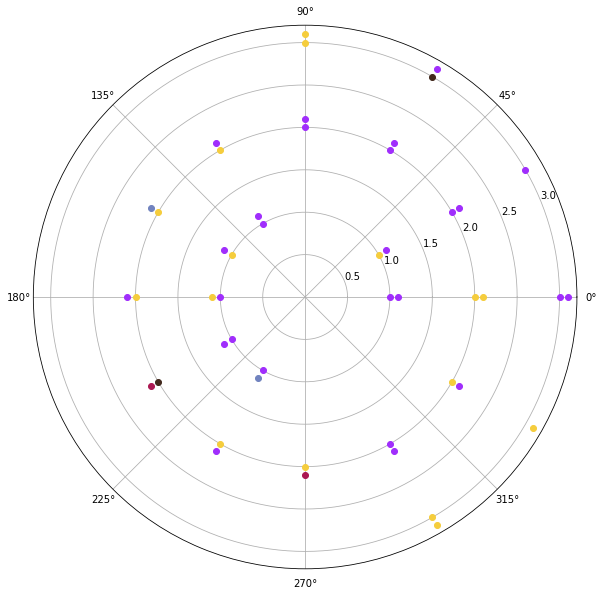

In [257]:
from sklearn.cluster import DBSCAN
alg = DBSCAN(eps=0.1, min_samples=2, metric='cosine')
clusters = calculate_clusters(data, alg)
print('There are', len(set(clusters)), 'clusters')
draw(data, df, clusters)

There are 6 clusters


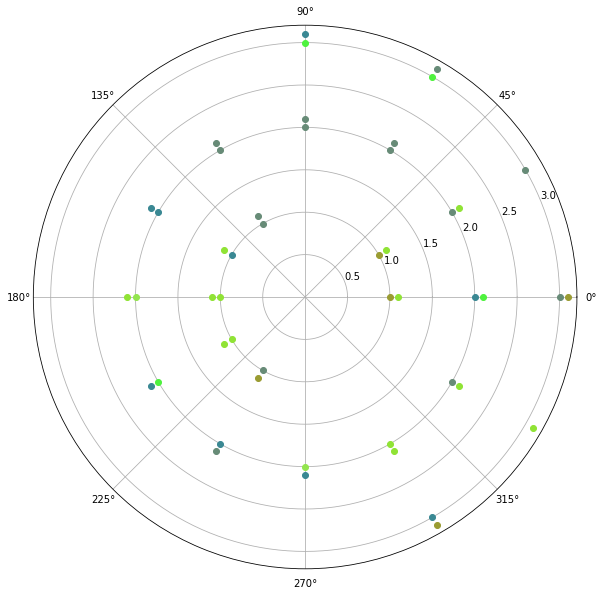

In [258]:
from sklearn.mixture import GaussianMixture
alg = GaussianMixture(n_components=6, random_state=0)
clusters = calculate_clusters(data, alg)
print('There are', len(set(clusters)), 'clusters')
draw(data, df, clusters)